In [ ]:
#Biblioteki języka python nięzbędne do wykonania przykładów z rozdziału IV
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

<h2>ROZDZIAŁ VI</h2>
<h3>6 APROKSYMACJA ORAZ INTERPOLACJA</h3>
<h4>6.1. PRZYKŁADY ZADAŃ INŻYNIERSKICH</h4>
<b>Przykład 6.1. Granica plastyczności Re stali 45 w podwyższonych temperaturach</b>

Granica plastyczności R<sub>e</sub>, dla stali 45, zmienia się wraz ze wzrostem temperatury w sposób określony w tabeli 6.1.

Tabela 6.1. R<sub>e</sub> dla podwyższonych temperatur wg PN-92/H-94009 „Odkuwki i pręty kute dla urządzeń ciśnieniowych"

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;text-align:center;">
        <td rowspan=2 style="border: 1px solid black;">Grubość pręta</td>
        <td colspan=5 style="border: 1px solid black;">Temperatura &deg;C</td>
    </tr>
    <tr>
        <td style="border: 1px solid black;">200</td>
        <td style="border: 1px solid black;">250</td>
        <td style="border: 1px solid black;">300</td>
        <td style="border: 1px solid black;">350</td>
        <td style="border: 1px solid black;">400</td>
    </tr>
    <tr>
        <td rowspan=2 style="border: 1px solid black;">do 100 mm</td>
        <td colspan=5 style="border: 1px solid black;">R<sub>e</sub></td>
    </tr>
    <tr>
        <td style="border: 1px solid black;">255</td>
        <td style="border: 1px solid black;">245</td>
        <td style="border: 1px solid black;">235</td>
        <td style="border: 1px solid black;">205</td>
        <td style="border: 1px solid black;">170</td>
    </tr>
    <tr>
        <td rowspan=2 style="border: 1px solid black;">od 100 mm do 250 mm</td>
        <td colspan=5 style="border: 1px solid black;">R<sub>e</sub></td>
    </tr>
    <tr>
        <td style="border: 1px solid black;">245</td>
        <td style="border: 1px solid black;">235</td>
        <td style="border: 1px solid black;">225</td>
        <td style="border: 1px solid black;">195</td>
        <td style="border: 1px solid black;">165</td>
    </tr>
    <tr>
        <td rowspan=2 style="border: 1px solid black;">od 250 mm do 500 mm</td>
        <td colspan=5 style="border: 1px solid black;">R<sub>e</sub></td>
    </tr>
    <tr>
        <td style="border: 1px solid black;">235</td>
        <td style="border: 1px solid black;">230</td>
        <td style="border: 1px solid black;">220</td>
        <td style="border: 1px solid black;">190</td>
        <td style="border: 1px solid black;">165</td>
    </tr>
</table>

Wartości z tabeli 6.1 przedstawiono również na rysunku 6.1.

Należy ustalić, jaka jest granica plastyczności dla pręta o grubości od 100 do 250 mm w temperaturze 320&deg;C.

Po to, aby rozwiązać zadanie, należy znaleźć analityczną zależność R<sub>e</sub> w funkcji temperatury, która w sposób możliwie najdokładniejszy odpowiada danym pomiarowym z tabeli 6.1.

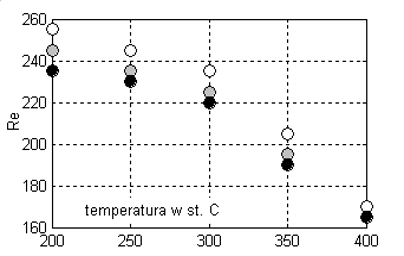
Rys. 6.1. Graficzna reprezentacja tabeli 6.1

<b>Przykład 6.2. Geometria krzywki</b>

Dla pięciu ściśle określonych położeń kątowych &alpha; krzywki mechanizmu ste-rującego pracą maszyny zadane są wysunięcia h współpracującego z krzywką popychacza. Na tej podstawie obliczono następujące kartezjańskie współrzędne punktów powierzchni krzywki: punkt 1: (0, 140); punkt 2: (30, 13); punkt 3: (60, 100); punkt 4: (90, 40); punkt 5: (97, 0).

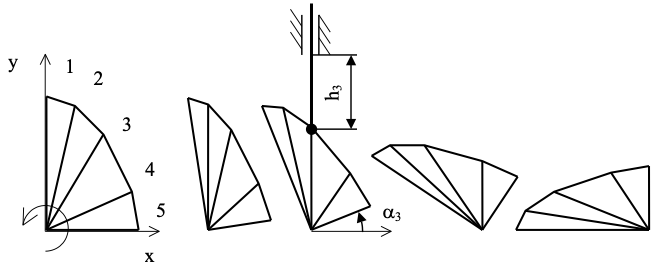
Rys. 6.2. Położenia kątowe krzywki i jej współpraca z popychaczem

Zaproponuj taki kształt krzywki, aby zachować żądane cechy geometryczne i uzyskać krzywą o ciągłych pochodnych.

<h4>6.2.CHARAKTERYSTYKA ZAGADNIENIA</h4>

W zagadnieniach inżynierskich często mamy do czynienia ze zbiorami dyskretnych danych. Mogą one pochodzić np. z pomiarów lub wyników obliczeń. Metody numeryczne opisane w niniejszym rozdziale pozwalają na podstawie takich danych m.in. na wyznaczanie wartości analizowanych wielkości w punktach leżących pomiędzy danymi (tzn. na zagęszczanie danych), analizę zbioru danych, np. ich trendu, położenia i wartości ekstremów.

Opisywane metody często są wykorzystywane dla realizacji innych metod numerycznych, np. całkowania w metodzie elementów skończonych (jako funkcja kształtu), itd.

W zależności od tego, czy dane będące przedmiotem przetwarzania są obarczone błędami (pomiarowymi, numerycznymi), czy też nie, wyróżniamy dwa podejścia: aproksymację oraz interpolację. Należy przy tym zaznaczyć, że często interpolację traktuje sią jako metodę aproksymacji.

Przedstawiając problem w dużym uproszczeniu, kiedy dane obarczone są błędami, stosujemy technikę aproksymacji. Zadaniem aproksymacji jest znalezienie takiej funkcji, która najlepiej przybliża charakter (trend, zmianę) zbioru danych wartości wejściowych (np. zmianę wartości granicy plastyczności w funkcji temperatury).

W przypadku aproksymacji niezwykle ważnym zagadnieniem jest możliwość oceny jej jakości. Po to, aby nie komplikować treści niniejszego rozdziału, do problemu odniesiemy się bez poruszania zagadnień statystycznych.

W przypadku zbioru danych znanego z dużą dokładnością możemy zażądać, aby opisująca je funkcja przechodziła przez wszystkie punkty zbioru danych. W przykładzie 6.2 poszukiwana krzywa opisująca geometrię krzywki musi przechodzić przez wybrane punkty. W przeciwnym razie mechanizm nie będzie spełniał swoich funkcji.

Na podstawie znalezionego opisu zbioru danych możemy pokusić się również o wyznaczanie wartości funkcji nie tylko wewnątrz badanego zbioru (zagęszczanie funkcji) ale także poza jego dziedziną. Taka metoda nazywa się ekstrapolacją.

<h4>6.3. METODY</h4>

<h5>6.3.1. Aproksymacja</h5>

<h6>6.3.1.1. Aproksymacja prostą</h6>

Aproksymacja za pomocą prostej polega na znalezieniu współczynników a oraz b funkcji 6.1, tak aby prosta najlepiej pasowała do opisywanego zbioru punktów (rys. 6.3):
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $f\left ( x \right )=ax+b$
        </td>
        <td>(6.1)</td>
    </tr>
</table>
Wymagamy przy tym, aby różnice wartości pomiędzy danymi a wartościami, jakie można obliczyć z przyjętej funkcji były jak najmniejsze. Dla każdego punktu xi, yi  zdefiniujemy tę różnicę w następujący sposób:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $r_{i}=y_{i}-f\left ( x_{i} \right )=y_{i}-\left (  ax_{i}+b\right )$
        </td>
        <td>(6.2)</td>
    </tr>
</table>

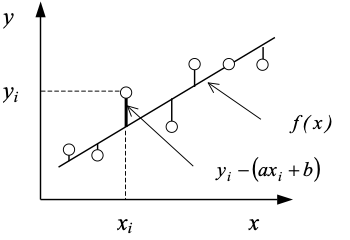
Rys. 6.3. Aproksymacja prostą

Załóżmy, że aproksymacja będzie najlepsza, jeśli suma kwadratów wszystkich zdefiniowanych w powyższy sposób różnic będzie najmniejsza. Musimy znaleźć minimum następującej funkcji:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\rho =\sum_{i=1}^{m}r_{i}^{2}=\sum_{i=1}^{m}\left [ y_{i}-\left ( ax_{i}+b \right ) \right ]^{2}$
        </td>
        <td>(6.3)</td>
    </tr>
</table>
W tym celu pochodne cząstkowe funkcji (6.3) przyrównujemy do zera:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\frac{\sigma \rho }{\sigma a} = 0$
        </td>
        <td>(6.4)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $\frac{\sigma \rho }{\sigma b} = 0$
        </td>
        <td>(6.5)</td>
    </tr>
</table>
Uzyskujemy układ równań, który musimy rozwiązać ze względu na a i b:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\sum_{i=1}^{m}2\left ( -x_{i} \right )\left [ y_{i}-\left ( ax_{i}+b \right ) \right ]=0$
        </td>
        <td>(6.6)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $\sum_{i=1}^{m}2\left ( -1 \right )\left [ y_{i}-\left ( ax_{i}+b \right ) \right ]=0$
        </td>
        <td>(6.7)</td>
    </tr>
</table>
Po przekształceniach:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left ( \sum_{i=1}^{m}x_{i}^{2} \right )a+\left ( \sum_{i=1}^{m}x_{i} \right )b = \sum_{i=1}^{m}x_{i}y_{i}$
        </td>
        <td>(6.8)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $\left ( \sum_{i=1}^{m}x_{i} \right )a+mb = \sum_{i=1}^{m}y_{i}$
        </td>
        <td>(6.9)</td>
    </tr>
</table>
W postaci macierzowej powyższy układ będzie przedstawiał się następująco:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}\sum_{i=1}^{m}x_{i}^{2} & \sum_{i=1}^{m}x_{i} \\ \sum_{i=1}^{m}x_{i} & m \end{bmatrix}
        \begin{bmatrix}a\\b \end{bmatrix}= 
        \begin{bmatrix}\sum_{i=1}^{m}x_{i}y_{i} \\ \sum_{i=1}^{m}y_{i}\end{bmatrix}$
        </td>
        <td>(6.10)</td>
    </tr>
</table>
Zauważmy, że macierz współczynników i wektor wyrazów wolnych można uzyskać za pomocą mnożenia odpowiednio przygotowanej macierzy A, a mianowicie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A=\begin{bmatrix}x_{1} & 1\\ x_{2} & 1\\ \vdots  & \vdots\\ x_m & 1\end{bmatrix}$
        </td>
        <td>(6.11)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}\sum_{i=1}^{m}x_{i}^{2} & \sum_{i=1}^{m}x_{i} \\ \sum_{i=1}^{m}x_{i} & m\end{bmatrix} = \begin{bmatrix}x_{1} & x_{2} & \cdots & x_{m} \\ 1 & 1 & \cdots & 1 \end{bmatrix}\begin{bmatrix}x_{1} & 1\\ x_{2} & 1\\ \vdots  & \vdots\\ x_m & 1\end{bmatrix}=A^{T}A$
        </td>
        <td>(6.12)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}\sum_{i=1}^{m}x_{i}y_{i} \\ \sum_{i=1}^{m}y_{i}\end{bmatrix} = \begin{bmatrix}x_{1} & x_{2} & \cdots & x_{m}\\ 1 & 1 & \cdots  & 1 \end{bmatrix}\begin{bmatrix}y_{1} \\ y_{2} \\ \vdots\\ y_{m} \end{bmatrix}=A^{T}y$
        </td>
        <td>(6.13)</td>
    </tr>
</table>
Oznaczmy wektor współczynników przez c, a wektor wartości, jakie przyjmują aproksymowane punkty przez y:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $c=\begin{bmatrix}a \\ b \end{bmatrix}$
        </td>
        <td>(6.14)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $y=\begin{bmatrix}y_{1} \\ y_{2} \\ \vdots \\ y_{m}\end{bmatrix}$
        </td>
        <td>(6.15)</td>
    </tr>
</table>
Okazuje się wówczas, że zadanie aproksymacji sprowadza się do rozwiązania poniższego równania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left ( A^{T}A \right )c=A^{T}y$
        </td>
        <td>(6.16)</td>
    </tr>
</table>
czyli w zapisie formalnym:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $c=\left ( A^{T}A \right )^{-1}A^{T}y$
        </td>
        <td>(6.17)</td>
    </tr>
</table>
<b>Przykład 6.3. Aproksymacja średniokwadratowa</b>

Niech dane będą następujące punkty pomiarowe (rys. 6.4):

In [ ]:
x = np.matrix([1, 2, 4.5, 5],np.float64)
y = np.matrix([1, 1.5, 1.5, 2.5],np.float64)
print(x)
print(y)

Utwórzmy macierz A i rozwiążmy układ równań uzyskując współczynniki prostej zapisane w wektorze c:

In [ ]:
x = np.transpose(x)
y = np.transpose(y)
A = np.concatenate((x,np.ones_like(x)),axis=1)
c = np.linalg.solve(A.transpose()*A,A.transpose()*y)
print(x)
print(y)
print(A)
print(c)

In [ ]:
plt.figure(1)
plt.plot(x,y,'ko')
plt.plot(x,np.polyval(np.asarray(c).ravel(),np.asarray(x).ravel()),'k-')
plt.grid()
plt.show()

Rys. 6.4. Aproksymacja średniokwadratowa prostą
<h6>6.3.1.2. Ocena jakości aproksymacji</h6>
Obserwując wykres funkcji aproksymującej na tle wykresu danych w postaci punktów można dokonać zgrubnej oceny jakości aproksymacji. Taka obserwacja nie jest jednak wystarczająca, aby ułatwić analizę jakości aproksymacji, wprowadzimy dwie metody: obserwację wykresu wektora reszt oraz metodę R<sup>2</sup>.

Wprowadźmy oznaczenie na wartość obliczaną z funkcji aproksymującej dla dowolnej x<sub>i</sub> jako:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\hat{y_{i}}=c_{1}x_{i}+c_{2}$
        </td>
        <td>(6.18)</td>
    </tr>
</table>
W ten sposób i-ta reszta będzie wyrażać się wzorem:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $r_{i}=y_{i}-\left ( c_{1}x_{i}+c_{2} \right )=y_{i}-\hat{y_{i}}$
        </td>
        <td>(6.19)</td>
    </tr>
</table>
Wektor reszt można pokazać na wykresie. Jeśli z analizy wykresu okaże się, że rozkład reszt jest przypadkowy, tzn. nie widać żadnej regularności, można wówczas stwierdzić, że aproksymacja jest przeprowadzona prawidłowo. Jeśli natomiast wykres reszt przedstawia jakąś regularność, to można przyjąć, że zastosowaliśmy niewłaściwy typ aproksymacji i nie możemy odwzorować zależności, jaka kryje się w zbiorze danych punktów.


<b>Przykład 6.4. Obserwacja wektora reszt</b>

In [ ]:
x = np.matrix(np.linspace(0,10,50))
y = 10*np.power(x,2)+x+20
x = np.transpose(x)
y = np.transpose(y)
blad_pomiaru = 100*(np.random.uniform(size=np.shape(x)) - 0.5)
dane_pomiarowe = y + blad_pomiaru
A = np.concatenate((x,np.ones_like(x)),axis=1)
c = np.linalg.solve(A.transpose()*A,A.transpose()*dane_pomiarowe)

plt.figure(2)
plt.plot(x,dane_pomiarowe,'ko')
plt.plot(x,np.polyval(np.asarray(c).ravel(),np.asarray(x).ravel()),'k-')
plt.grid()
plt.show()

Rys. 6.5. Aproksymacja prostą danych o parabolicznym charakterze zmienności 

Obserwacja wykresu (rys 6.5) budzi wątpliwości, czy linia prosta jest w tym przypadku najwłaściwszą postacią funkcji aproksymującej.

In [ ]:
plt.figure(3)
plt.bar(np.asarray(x).ravel(),np.asarray(dane_pomiarowe).ravel()-np.polyval(np.asarray(c).ravel(),np.asarray(x).ravel()),width=0.15)
plt.grid()
plt.show()

Rys. 6.6. Wektor reszt

Po wykonaniu wykresu wektora reszt (rys. 6.6) widać doskonale, że reszty układają się w zależność paraboliczną, która nie znalazła odbicia w zastosowanej funkcji aproksymującej.

Opisana metoda nadaje się do zgrubnej oceny jakości aproksymacji. Do oceny dokładniejszej potrzebna jest miara liczbowa.

W procesie aproksymacji minimalizujemy sumę kwadratów reszt:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left \| r \right \|_{2} = \sum_{i-1}^{m}\left ( y_{i}-\hat{y_{i}} \right )^{2}$
        </td>
        <td>(6.20)</td>
    </tr>
</table>
Powstaje pytanie, czy wartość minimalnej sumy kwadratów może świadczyć o jakości najlepszego dopasowania. Można przecież powiedzieć, że im mniejsza wartość $\left \| r \right \|_{2}$ tym lepsza aproksymacja. Problem jednak leży w tym, że taka miara będzie zależna od wartości aproksymowanych danych oraz liczby punktów. Za pomocą $\left \| r \right \|_{2}$ nie możemy porównać dwóch zadań aproksymacji.
Metoda $R^{2}$ wykorzystuje informacje o $\left \| r \right \|_{2}$, lecz oferuje rozwiązanie wolne od powyższych wad. Wprowadźmy oznaczenie na wartość średnią ze zbioru danych punków.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\bar{y}=\frac{1}{m}\sum_{i=1}^{m}y_{i}$
        </td>
        <td>(6.21)</td>
    </tr>
</table>
Konstrukcja $R^{2}$ zawiera iloraz sumy kwadratów reszt (rys. 6.7 po lewej) do wartości średniej z aproksymowanych punktów (rys. 6.7 po prawej) i niezależnie od wartości oraz liczby danych przyjmuje wartości niemianowane w zakresie od 0 do 1. 
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $R^{2}=1-\frac{\sum \left ( y_{i}-\hat{y_{i}} \right )}{\sum \left ( y_{i}-\bar{y_{i}} \right )}$
        </td>
        <td>(6.22)</td>
    </tr>
</table>

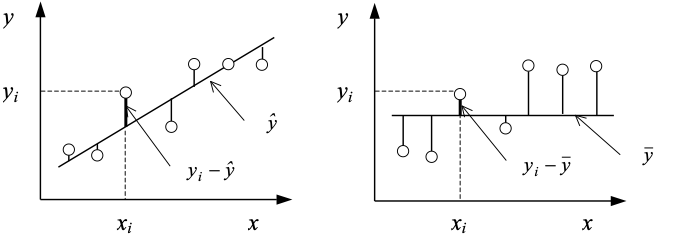
Rys. 6.7. Ilustracja metody $R^{2}$

W metodzie $R^{2}$ wartość $\left \| r \right \|_{2}$ jest porównywana z różnicą kwadratów względem średniej (czyli przypadkiem, w którym zmienność danych przybliżonoby wykresem prostej poziomej o wartości). 

Jeśli w wyniku aproksymacji za pomocą średniej uzyskaliśmy taką samą sumę kwadratów co suma kwadratów reszt względem prostej aproksymującej, wówczas licznik i mianownik wyrażenia (6.22) będą sobie równe i $R^{2}$ będzie równe zeru. W tym przypadku zbiór aproksymowanych danych nie wykazuje żadnej tendencji i nie można poprowadzić żadnej krzywej aproksymującej. 

Jeśli aproksymowane dane pokrywają się z aproksymującą krzywą, to zgodność należy uznać za idealną. Suma kwadratów reszt w liczniku wyrażenia (6.22) jest wówczas równa zeru, a $R^{2}$ przyjmie wartość maksymalną równą 1.

Obliczmy wartość $R^{2}$ dla danych z przykładu 6.4.

<b>Przykład 6.5. $R^{2}$ dla danych z przykładu 6.4</b>

In [ ]:
# Przykład 6.5. R2 dla danych z przykładu 6.4
r = dane_pomiarowe - A*c
R2 = 1 - (np.linalg.norm(r,ord=2)/np.linalg.norm(dane_pomiarowe-np.mean(dane_pomiarowe),ord=2))**2
print(R2)

Prześledźmy przykład, w którym aproksymacja nie ma sensu, gdyż dane te nie charakteryzują się żadną tendencją zmian.

<b>Przykład 6.6. $R^{2} = 0$</b>

Przykładem danych, które nie wyrażają żadnej tendencji będą punkty równomiernie rozłożone na okręgu (rys. 6.8). 

In [ ]:
t = np.matrix(np.arange(0,2*np.pi, np.pi/18))
t = t.transpose()
x = np.sin(t)
y = np.cos(t)

A = np.concatenate((x,np.ones_like(x)),axis=1)
c = np.linalg.solve(A.transpose()*A,A.transpose()*y)
print(c)

Otrzymaliśmy współczynniki prostej aproksymującej równe (w przybliżeniu) zeru.

In [ ]:
plt.figure(4)
plt.plot(x,y,'ko')
#plt.grid()
plt.axes().set_aspect('equal')
plt.plot(x, np.polyval(np.asarray(c).ravel(),np.asarray(x).ravel()), 'k-')
plt.grid()
plt.show()

Rys. 6.8. Przypadek danych dla których aproksymacja nie ma sensu!

In [ ]:
r = y - A*c
R2 = 1 - (np.linalg.norm(r,ord=2)/np.linalg.norm(y-np.mean(y),ord=2))**2
print(R2)

Jak widać $R^{2}$ równe jest również zeru. Aproksymacja w przypadku tych danych nie ma sensu.

<h6>6.3.1.3. Aproksymacja wielomianem</h6>

W przypadku aproksymacji liniowej funkcja aproksymująca miała postać:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $f\left ( x \right )=ax+b$
        </td>
        <td>(6.23)</td>
    </tr>
</table>
Funkcją aproksymującą może być jednak dowolny wielomian:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $f\left ( x \right )=c_{1}x^{n-1}+c_{2}x^{n-2}+\cdots+c_{n}x^{0}$
        </td>
        <td>(6.24)</td>
    </tr>
</table>
W przypadku wielomianu drugiego stopnia:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $f\left ( x \right )=c_{1}x^{2}+c_{2}x+c_{3}$
        </td>
        <td>(6.25)</td>
    </tr>
</table>
(6.25)
macierz A będzie miała postać:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A=\begin{bmatrix}x_{1}^{2} &  x_{1} & 1 \\ x_{2}^{2} &  x_{2}& 1 \\ \vdots &  \vdots & \vdots \\ x_{m}^{2} & x_{m} & 1 \end{bmatrix}$
        </td>
        <td>(6.26)</td>
    </tr>
</table>
Zastosujmy wielomian drugiego stopnia dla danych z przykładu 6.4.

<b>Przykład 6.7. Aproksymacja wielomianem</b>

Utwórzmy macierz A wg wzoru (6.26).

In [ ]:
x = np.matrix(np.linspace(0,10,50))
y = 10*np.power(x,2)+x+20
x = np.transpose(x)
y = np.transpose(y)
blad_pomiaru = 100*(np.random.uniform(size=np.shape(x)) - 0.5)
dane_pomiarowe = y + blad_pomiaru
A = lambda x: np.concatenate((np.power(x,2),x,np.ones_like(x)),axis=1)

Wyliczmy wartości współczynników wielomianu i narysujmy jego przebieg na wykresie (rys. 6.9). Pokażmy również wektor reszt.

In [ ]:
c = np.linalg.solve(A(x).transpose()*A(x),A(x).transpose()*dane_pomiarowe)

plt.figure(5)
plt.plot(x,dane_pomiarowe,'ko')
plt.plot(x,np.polyval(np.asarray(c).ravel(),np.asarray(x).ravel()),'k-')
plt.grid()
plt.show()

Rys. 6.9. Aproksymacja wielomianem kwadratowym

In [ ]:
plt.figure(6)
plt.bar(np.asarray(x).ravel(),np.asarray(dane_pomiarowe).ravel()-np.polyval(np.asarray(c).ravel(),np.asarray(x).ravel()),width=0.15)
plt.grid()
plt.show()

Rys. 6.10. Wektor reszt dla wielomianu kwadratowego

Z rysunku 6.9 widać, że wielomian kwadratowy znacznie lepiej oddaje charakter zmian aproksymowanych danych. Losowy charakter wektora reszt (rys. 6.10) również świadczy o poprawności aproksymacji.

Najważniejszym sprawdzianem będzie jednak obliczenie wartości R2.

In [ ]:
r = dane_pomiarowe - A(x)*c
R2 = 1 - (np.linalg.norm(r,ord=2)/np.linalg.norm(dane_pomiarowe-np.mean(dane_pomiarowe),ord=2))**2
print(R2)

Wartość $R^{2}$, bardzo bliska jedności, informuje nas o znalezieniu funkcji, która bardzo dobrze opisuje zbiór punktów.

<h6>6.3.1.4. Funkcje bazowe</h6>

W poprzednim punkcie dokonaliśmy uogólnienia aproksymacji prostą na aproksymację za pomocą wielomianów. Zapiszmy wzór (6.24) w ogólniejszej postaci:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $f\left ( x \right )=c_{1}f_{1}\left ( x \right )+c_{2}f_{2}\left ( x \right )+\cdots+c_{n}f_{n}\left ( x \right )$
        </td>
        <td>(6.27)</td>
    </tr>
</table>
gdzie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $f_{i}\left ( x \right )=x^{n-1}$
        </td>
        <td>&nbsp;</td>
    </tr>
</table>
Funkcje $f_{i}\left ( x \right )$ nazywamy funkcjami bazowymi. Mogą one mieć bardzo różną postać, np. $\frac{1}{x}$, $sin\left ( x \right )$. Dla n funkcji bazowych macierz A będzie miała postać:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A=\begin{bmatrix}f_{1}\left ( x_{1} \right ) & f_{2}\left ( x_{1} \right ) & \cdots & f_{n}\left ( x_{1} \right ) \\ f_{1}\left ( x_{2} \right ) & f_{2}\left ( x_{2} \right ) & \cdots & f_{n}\left ( x_{2} \right ) \\ \vdots & \vdots & \vdots & \vdots \\ f_{1}\left ( x_{m} \right ) & f_{2}\left ( x_{m} \right ) & \cdots & f_{n}\left ( x_{m} \right ) \end{bmatrix}$
        </td>
        <td>(6.28)</td>
    </tr>
</table>

W następnym punkcie rozdziału pokażemy przykład z trygonometrycznymi funkcjami bazowymi.

<h6>6.3.1.5. Aproksymacja funkcjami trygonometrycznymi</h6>

Aproksymację za pomocą funkcji trygonometrycznych stosuje się na przykład wtedy, gdy aproksymowane dane mają charakter okresowy.

<b>Przykład 6.8. Aproksymacja funkcjami trygonometrycznymi</b>

Utwórzmy wektor danych z funkcji trygonometrycznej danej w postaci $f\left ( x \right )=\frac{\left ( 3+4sin\left ( x \right ) \right )}{\left ( 5-4cos\left ( x \right ) \right )}-1$, (rys. 6.11).

In [ ]:
x = np.matrix(np.arange(-10,11,1))
x = x.transpose()
y = (3.0+4.0*np.sin(x))/(5.0-4.0*np.cos(x))-1

plt.figure(7)
plt.plot(x,y,'ko')
plt.grid()
plt.show()

Rys. 6.11. Dane do przykładu 6.8

Utwórzmy macierz A dla funkcji bazowych sin(x) i cos(x) wg wzoru (6.28). Ze względu na równe odległości pomiędzy danymi punktami macierz A staje się diagonalną, a wyznaczenie współczynników sprowadza się wówczas do obliczenia dobrze znanych wyrażeń na amplitudy funkcji bazowych. Jednakże ze względu na zachowanie jednolitego charakteru podejścia do omawianych funkcji bazowych pozostaniemy przy rozwiązywaniu układu równań jak w poprzednich przykładach. Mamy więc:

In [ ]:
A = lambda x: np.concatenate((np.sin(x),np.cos(x)),axis=1)
c = np.linalg.solve(A(x).transpose()*A(x),A(x).transpose()*y)
xa = np.matrix(np.arange(-10.0,11.0,0.1))
xa = xa.transpose()

plt.plot(xa,A(xa)*c,'k-')
plt.plot(x,y,'ko')
plt.grid()
plt.show()

r = y - A(x)*c
R2 = 1 - (np.linalg.norm(r,ord=2)/np.linalg.norm(y-np.mean(y),ord=2))**2

Rys. 6.12. Aproksymacja za pomocą funkcji bazowych sin(x) i cos(x)

Z rysunku 6.12 wynika, że jakość aproksymacji pozostawia wiele do życze-nia. Rozszerzmy macierz A o dalsze funkcje bazowe. Będą to funkcje bazowe sin i cos o rosnących częstościach: sin(2x), cos(2x), sin(3x) oraz cos(3x).

In [ ]:
A = lambda x: np.concatenate((np.sin(x),np.cos(x),np.sin(2*x),np.cos(2*x),np.sin(3*x),np.cos(3*x)),axis=1)
c = np.linalg.solve(A(x).transpose()*A(x),A(x).transpose()*y)

r = y - A(x)*c
R2 = 1 - (np.linalg.norm(r,ord=2)/np.linalg.norm(y-np.mean(y),ord=2))**2

plt.plot(xa,A(xa)*c,'k-')
plt.plot(x,y,'ko')
plt.grid()
plt.show()

Rys. 6.13. Aproksymacja za pomocą funkcji bazowych sin(x), cos(x), sin(2x), cos(2x), sin(3x) oraz cos(3x)

Tym razem otrzymaliśmy znacznie lepsze dopasowanie funkcji aproksymującej (rys. 6.13).

<h5>6.3.2. Interpolacja</h5>

<h6>6.3.2.1. Interpolacja wielomianem</h6>
    
Zadanie interpolacji wielomianem polega na znalezieniu takich współczynników wielomianu stopnia  n–1 (6.29), aby funkcja interpolująca przebiegała przez wszystkie n punktów.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $W\left ( x \right ) = c_{1}x^{n-1}+c_{2}x^{n-2}+\cdots+c_{n}x^{0}$
        </td>
        <td>(6.29)</td>
    </tr>
</table>
W przypadku, gdy wielomian interpolacyjny jest wielomianem kwadratowym, mamy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $W\left ( x \right ) = c_{1}x^{2}+c_{2}x+c_{3}$
        </td>
        <td>(6.30)</td>
    </tr>
</table>
Musimy wówczas zażądać, aby wielomian przebiegał przez trzy punkty: (x<sub>1</sub>, y<sub>1</sub>), (x<sub>2</sub>, y<sub>2</sub>) oraz (x<sub>3</sub>, y<sub>3</sub>). Muszą być spełnione trzy warunki:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $W\left ( x_{1} \right ) = c_{1}x_{1}^{2}+c_{2}x_{1}+c_{3}$
        </td>
        <td>(6.31)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $W\left ( x_{1} \right ) = c_{1}x_{2}^{2}+c_{2}x_{2}+c_{3}$
        </td>
        <td>(6.32)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $W\left ( x_{1} \right ) = c_{1}x_{3}^{2}+c_{2}x_{3}+c_{3}$
        </td>
        <td>(6.33)</td>
    </tr>
</table>
Powyższy układ możemy przedstawić w postaci macierzowej:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        \begin{bmatrix}x_{1}^{2} & x_{1} & 1\\ x_{2}^{2} & x_{2} & 1\\ x_{3}^{2} & x_{3} & 1\end{bmatrix}\begin{bmatrix}c_{1}\\ c_{2}\\ c_{3}\end{bmatrix}=\begin{bmatrix}W\left( x_{1} \right )\\ W\left( x_{2} \right )\\ W\left( x_{3} \right )\end{bmatrix}
        $
        </td>
        <td>(6.34)</td>
    </tr>
</table>
Wartości współczynników wielomianu uzyskujemy rozwiązują układ równań (6.34). Choć niniejsza procedura wydaje się być prosta, ze względu na niebezpieczeństwo złego uwarunkowania układu równań nie zawsze jest to metoda najlepsza.

<h6>6.3.2.2. Interpolacja za pomocą wielomianu Lagrange’a</h6>

Interpolacja metodą Lagrange’a pozwala uzyskać wielomian interpolacyjny bez rozwią-zywania układu równań. W przypadku liniowego wielomianu interpolacyjnego wzór Lagrange’a będzie miał postać:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        W_{1}\left ( x \right )=y_{1}L_{1}\left ( x \right )+y_{2}L_{2}\left ( x \right )
        $
        </td>
        <td>(6.35)</td>
    </tr>
</table>
gdzie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        L_{1}\left ( x \right )=\frac{x-x_{2}}{x_{1}-x_{2}},  L_{2}\left ( x \right ) = \frac{x-x_{1}}{x_{2}-x_{1}}
        $
        </td>
        <td>(6.36)</td>
    </tr>
</table>
Wielomian kwadratowy przedstawia się następująco:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        W_{2}\left ( x \right ) = y_{1}L_{1}\left ( x \right )+y_{2}L_{2}\left ( x \right )+y_{3}L_{3}\left ( x \right )
        $
        </td>
        <td>(6.37)</td>
    </tr>
</table>
gdzie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        \begin{align*}
         & L_{1}\left ( x \right )=\frac{\left ( x-x_{2} \right )\left ( x-x_{3} \right )}{\left ( x_{1}-x_{2} \right )\left ( x_{1}-x_{3} \right )}\\ 
         & L_{2}\left ( x \right )=\frac{\left ( x-x_{2} \right )\left ( x-x_{3} \right )}{\left ( x_{2}-x_{1} \right )\left ( x_{2}-x_{3} \right )}\\ 
         & L_{3}\left ( x \right )=\frac{\left ( x-x_{1} \right )\left ( x-x_{2} \right )}{\left ( x_{3}-x_{1} \right )\left ( x_{3}-x_{2} \right )} 
        \end{align*}
        $
        </td>
        <td>(6.38)</td>
    </tr>
</table>
W ogólnym przypadku:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        W_{n-1}\left ( x \right ) = y_{1}L_{1}\left ( x \right )+y_{2}L_{2}\left ( x \right )+\cdots+y_{n}L_{n}\left ( x \right )=\sum_{j=1}^{n}y_{j}L_{j}\left ( x \right )
        $
        </td>
        <td>(6.39)</td>
    </tr>
</table>
gdzie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        L_{j}\left ( x \right )=\prod_{k=1,k\neq j}^{n}\frac{x-x_{k}}{x_{j}-x_{k}}
        $
        </td>
        <td>(6.40)</td>
    </tr>
</table>

<h6>6.3.2.3. Wielomian interpolacyjny Newtona</h6>

Kwadratowy wielomian Newtona ma postać:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        W_{2}\left ( x \right ) = c_{1}+c_{2}\left ( x-x_{1} \right )+c_{3}\left ( x-x_{1} \right )\left ( x-x_{2} \right )
        $
        </td>
        <td>(6.41)</td>
    </tr>
</table>
Zastosowanie trzech warunków daje układ równań:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        W_{2}\left ( x_{1} \right ) = c_{1} = y_{1}
        $
        </td>
        <td>(6.42)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $
        W_{2}\left ( x_{2} \right ) = c_{1}+c_{2}\left ( x_{2}-x_{1} \right )=y_{2}
        $
        </td>
        <td>(6.43)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $
        W_{2}\left ( x_{3} \right ) = c_{1}+c_{2}\left ( x_{3}-x_{1} \right )+c_{3}\left ( x_{3}-x_{1} \right )\left ( x_{3}-x_{2} \right )
        $
        </td>
        <td>(6.44)</td>
    </tr>
</table>
W zapisie macierzowym będziemy mieli:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        \begin{bmatrix}1 & 0 & 0\\ 1 & \left ( x_{2}-x_{1} \right )& 0\\ 1 & \left ( x_{3}-x_{1} \right ) & \left ( x_{3}-x_{1} \right )\left ( x_{3}-x_{2} \right )\end{bmatrix}\begin{bmatrix}c_{1}\\ c_{2}\\ c_{3}\end{bmatrix}=\begin{bmatrix}y_{1}\\ y_{2}\\ y_{3}\end{bmatrix} 
        $
        </td>
        <td>(6.45)</td>
    </tr>
</table>
Dzięki odpowiedniej bazie wielomianu Newtona, układ równań (6.45) można rozwiązać odpowiednio operując na kolumnach i wierszach. Po pewnych przekształceniach mamy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        \begin{bmatrix}1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 1\end{bmatrix}\begin{bmatrix}c_{1}\\ c_{2}\\ c_{3}\end{bmatrix}=\begin{bmatrix}y_{1}\\ f\left [ x_{1},x_{2} \right ]\\ f\left [ x_{1},x_{2},x_{3} \right ]\end{bmatrix}
        $
        </td>
        <td>(6.46)</td>
    </tr>
</table>
gdzie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        f\left [ x_{1},x_{2} \right ] = \frac{y_{2}-y_{1}}{x_{2}-x_{1}}
        $
        </td>
        <td>(6.47)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $
        f\left [ x_{1},x_{2},x_{3} \right] = \frac{f\left [ x_{2},x_{3} \right ]-f\left [ x_{1},x_{2} \right ]}{x_{3}-x_{2}}
        $
        </td>
        <td>(6.48)</td>
    </tr>
</table>
Wielkości $f\left [ x_{1},x_{2} \right ]$ oraz $f\left [ x_{1},x_{2},x_{3} \right]$  nazywamy różnicami skończonymi odpowiednio pierwszego i drugiego rzędu.

<h6>6.3.2.4. Krzywa sklejana (splajn)</h6>

Przedstawione powyżej metody interpolacji nie zawsze są dostatecznie dokładne. Wprawdzie założenia interpolacji gwarantują, że wielomian będzie przechodził przez wszystkie wskazane węzły, jednak dokładność odwzorowania charakteru zmian pomię-dzy punktami nie będzie zachowana. Sytuacja nie ulegnie zmianie nawet, gdy zwięk-szymy stopień wielomianu.

Na rysunku 6.14.a przedstawiono próbę interpolacji wielomianem 5-go stopnia. W związku z tym, że jej wynik nie był zadowalający, zwiększono stopień wielomianu. Próba interpolacji wielomianem 9-go stopnia również nie jest satysfakcjonująca.

a)
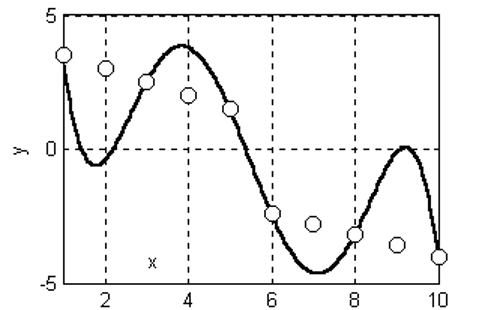
  
b)
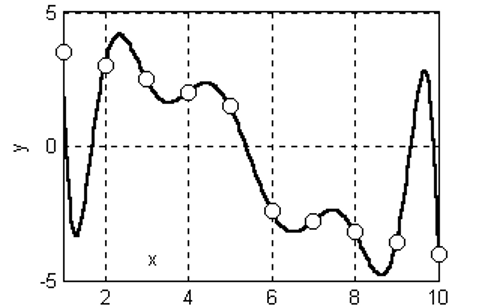
Rys. 6.14. Próba interpolacji za pomocą wielomianu 5-go stopnia (a) i 9-go stopnia (b)

Wyjściem z sytuacji jest rezygnacja z próby interpolowania całego zakresu danych jednym wielomianem wysokiego stopnia. Zamiast tego interesujący nas zakres można podzielić na przedziały i każdy z nich interpolować wielomianem niższego stopnia (rys. 6.15).

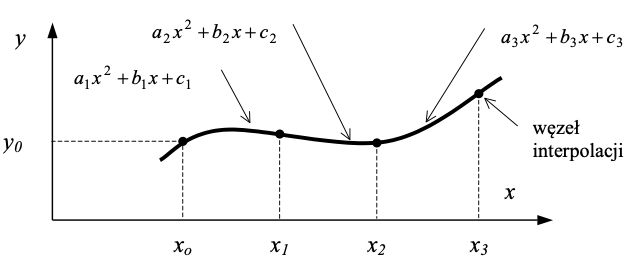
Rys. 6.15. Aproksymacja krzywą sklejaną

Wymaga to spełnienia określonych warunków:
1. Wartości funkcji aproksymujących muszą być równe wartościom współrzęd-nych węzłów interpolacji.
2. Wartości pochodnych funkcji aproksymujących przechodzących przez ten sam węzeł muszą być sobie równe.
3. Ważnym zagadnieniem jest przebieg (kształt) początków i końców krzywej sklejanej. W niniejszych rozważaniach pominiemy ten aspekt i przyjmiemy, że pierwsze dwa węzły będą połączone odcinkiem prostym. Jest to równoznaczne z żądaniem, aby druga pochodna pierwszego wielomianu była równa zeru.

<b>Przykład 6.9. Działanie metody splajn</b>

Przyjmijmy, że należy przeprowadzić krzywą sklejaną przez 4 punkty o współrzędnych:

In [ ]:
x = np.matrix([3, 4.5, 7, 9],np.float64)
w = np.matrix([2.5, 1, 2.5, 0.5],np.float64)

Spełnione muszą zostać następujące warunki dotyczące wartości wielomianów w węzłach:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{cases}
        9a_{1}+3b_{1}+c_{1}=2,5\\ 
        20,25a_{1}+4,5b_{1}+c_{1}=1\\ 
        20.25a_{2}+4,5b_{2}+c_{2}=1\\ 
        49a_{2}+7b_{2}+c_{2}=2,5\\ 
        49a_{3}+7b_{3}+c_{3}=2,5\\ 
        81a_{3}+9b_{3}+c_{3}=0,5
        \end{cases}$
        </td>
        <td>(6.49)</td>
    </tr>
</table>
Spełnione muszą zostać dalsze warunki dotyczące równości pierwszych pochodnych przez sąsiadujące funkcje:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{matrix}
        9a_{1}+b_{1}=9a_{2}+b_{2}\\ 
        14a_{2}+b_{2}=14a_{3}+b_{3}
        \end{matrix}$
        </td>
        <td>(6.50)</td>
    </tr>
</table>
Dodatkowo zakładamy, że:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $a_{1}=0$
        </td>
        <td>(6.51)</td>
    </tr>
</table>
Dla wyznaczenia 9 niewiadomych współczynników mamy 9 równań.

Tworzymy układ równań: 

In [ ]:
A=np.matrix([[9, 3, 1, 0, 0, 0, 0, 0, 0],
            [20.25, 4.5, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 20.25, 4.5, 1, 0, 0, 0],
            [0, 0, 0, 49, 7, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 49, 7, 1],
            [0, 0, 0, 0, 0, 0, 81, 9, 1],
            [9, 1, 0, -9, -1, 0, 0, 0, 0],
            [0, 0, 0, 14, 1, 0, -14, -1, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0]],np.float64)
b = np.matrix([2.5, 1, 1, 2.5, 2.5, 0.5, 0, 0, 0],np.float64).T

W rozwiązaniu otrzymujemy współczynniki wielomianów:

In [ ]:
c = np.linalg.solve(A,b)
print(c)

Narysujmy wszystkie trzy sklejone wielomiany: 

In [ ]:
s1=np.polyval(c[0:3],np.linspace(3,4.5,10))
s2=np.polyval(c[3:6],np.linspace(4.5,7,10))
s3=np.polyval(c[6:9],np.linspace(7,9,10))

plt.plot(x,w,'ko')
plt.plot(np.linspace(3,4.5,10),s1,'k-')
plt.plot(np.linspace(4.5,7,10),s2,'k--')
plt.plot(np.linspace(7,9,10),s3,'k-')
plt.grid()
plt.show()

Rys. 6.16. Interpolacja krzywą sklejaną

<h4>6.4. PRZYKŁADY</h4>

<b>Przykład 6.10. Rozwiązanie przykładu 6.1</b>

Zapiszmy wektory temperatury i odpowiadających im wartości granicy plastyczności R<sub>e</sub>:

In [ ]:
temp = np.array([200,250,300,350,400],np.float64)
Re = np.array([245, 235, 225, 195, 165],np.float64)

Do obliczenia współczynników wielomianu drugiego stopnia użyjemy polecenia polyfit: 

In [ ]:
p = np.polyfit(temp,Re,2)
print(p)

Wielomian aproksymujący ma więc postać:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        y=-0,0017x^{2}+0,6286x+187,28
        $
        </td>
        <td>(6.52)</td>
    </tr>
</table>
	 	(6.52)
Na tej podstawie, za pomocą polecenia polyval możemy narysować wykres funkcji aproksymującej (rys. 6.17):

In [ ]:
t = np.arange(200,401)
f = np.polyval(p,t) 
plt.plot(t,f,'k-',temp,Re,'ko')
plt.grid()
plt.show()

Rys. 6.17. Wielomian aproksymujący dane pomiarowe wartości R<sub>e</sub> w funkcji temperatury

Korzystając z polecenia polyval dowiemy się również, jaka wartość R<sub>e</sub> odpowiada temperaturze 320&deg;C: 

In [ ]:
t320 = np.polyval(p,320)
print(t320)

<b>Przykład 6.11. Rozwiązanie przykładu 6.2</b>

Zadanie rozwiążemy stosując interpolację krzywymi sklejanymi trzeciego stopnia. W tym celu zdefiniujmy wektory współrzędnych:

In [ ]:
x = np.array([0, 30, 60, 90, 97],np.float64)
y = np.array([140, 130, 100, 40, 0],np.float64)

Skorzystamy z polecenia interp1 z opcją ‘cubic’:

In [ ]:
plt.plot(x,y,'ko')
fi = interp1d(x,y,'cubic')

xi = np.linspace(0,97,100)
yi = fi(xi)

plt.plot(xi,yi,'k-')
plt.grid()
plt.show()

Rys. 6.18. Interpolacja krzywą sklejaną

Otrzymana krzywa sklejana (rys. 6.18) przechodzi przez wszystkie węzły interpola-cji. Poszczególne segmenty krzywej mają w węzłach ciągłe pochodne.

<h4>6.5. ZADANIA</h4>

<b>Zadanie 6.1</b>

Korzystając z danych tabelarycznych (tab. 6.2) wyznacz twardość HRC dla próbki o grubości 4 mm.

Tabela 6.2.	Hartowność stali 45
<table>
    <tr>
        <td>odległość od czoła próbki [mm]</td>
        <td>2</td>
        <td>3</td>
        <td>5</td>
        <td>7</td>
        <td>9</td>
        <td>11</td>
        <td>13</td>
        <td>15</td>
    </tr>
    <tr>
        <td>twardość HRC</td>
        <td>58.0</td>
        <td>55.5</td>
        <td>46.0</td>
        <td>32.8</td>
        <td>30.8</td>
        <td>29.6</td>
        <td>28.8</td>
        <td>28.0</td>
    </tr>
</table>

<b>Zadanie 6.2</b>

Korzystając z danych zamieszczonych w tabeli 6.3 określ wytrzymałość na pełzanie stali 45 w temperaturze 400C.

Tabela 6.3.	Wytrzymałość na pełzanie przy rozciąganiu
<table>
    <tr>
        <td>Temperatura &deg;C</td>
        <td>350</td>
        <td>360</td>
        <td>370</td>
        <td>380</td>
        <td>390</td>
        <td>400</td>
        <td>410</td>
        <td>420</td>
        <td>430</td>
        <td>440</td>
        <td>450</td>
        <td>460</td>
        <td>470</td>
        <td>480</td>
        <td>490</td>
        <td>500</td>
    </tr>
    <tr>
        <td>R<sub>z</sub>/10000 MPa</td>
        <td>245</td>
        <td>235</td>
        <td>224</td>
        <td>212</td>
        <td>200</td>
        <td>186</td>
        <td>173</td>
        <td>156</td>
        <td>137</td>
        <td>116</td>
        <td>98</td>
        <td>86</td>
        <td>76</td>
        <td>69</td>
        <td>61</td>
        <td>53</td>
    </tr>
</table>

<h4>6.6. PYTANIA/</h4>
1.	Na czym polega zadanie aproksymacji?
2.	Na czym polega zadanie interpolacji?
3.	Jak oszacować jakość aproksymacji?
4.	Wyjaśnić czym są  funkcje bazowe?
5.	Do czego stosuje się funkcje sklejane?

<h4>6.7. LITERATURA</h4>
1.	Recktenwald G., 2000. Numerical Methods with MATLAB: Implementations and Applications. Prentice Hall.
2.	Chapra S.C., 1998. Numerical Method for Engineers with Program and Software Applications. WCB/McGraw-Hill.

Copyright 2005-2019, dr inż. Krzysztof Nowicki